<a href="https://colab.research.google.com/github/INmais/LEIS-2001-collaborative-project/blob/main/Mobility/Mobility_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#base
import pandas as pd

* needed to delete the first rows to be readable (think of a matrix where first row are the headers)
* information in those first rows are metadata, not actual data (so put in on the metadata.md file (.md is for markdown)
* when saving as csv, be careful with separator, this case had to be set ';'
* Most can be done in python, "Data Wrangling
with pandas": https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* there are diferent data structures (lists, dictionaries, etc), but will work with dataframes (using pandas), as it is easier to work with
* Intro and explanation for pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html

## Reading files:

In [3]:
DATA_FILEPATH_pa = 'https://raw.githubusercontent.com/INmais/LEIS-2001-collaborative-project/main/Mobility/Dados/PA_2009_2019.csv' 
pa = pd.read_csv(DATA_FILEPATH_pa, sep=';') #for all parameters see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
pa.fillna(value=0).head(5) #when stating .head will just show first n rows (this case 5), if using ".tail" will just show last n rows

,Distrito,Municipio,Tipo de veiculo,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,Águeda,Agrícola,1194,1304,1369,1500,1657,1746.0,1876.0,2127.0,2130.0,2166.0,2210.0
1,Aveiro,Águeda,Ciclomotor,4037,4293,4253,4183,4118,4114.0,4124.0,4200.0,3926.0,3870.0,3838.0
2,Aveiro,Águeda,Ligeiros,26749,29998,28914,28758,28938,29306.0,31218.0,36121.0,30896.0,32692.0,33789.0
3,Aveiro,Águeda,Máquinas Industriais,35,44,43,40,68,69.0,71.0,77.0,138.0,157.0,162.0
4,Aveiro,Águeda,Motociclos,801,930,900,967,1002,1062.0,1186.0,1607.0,1540.0,1701.0,1858.0


In [23]:
pa = pa.set_index('Municipio')

In [25]:
pa.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2451.000000,2453.000000,2462.000000,2466.000000,2467.000000,2467.000000
mean,2566.979361,2712.739377,2683.455281,2698.636180,2755.210846,2757.008976,2826.302487,2895.804224,2996.505272,3120.300365,3208.137414
std,12177.754248,12337.150712,12178.199814,12063.831042,12216.057562,12022.499258,12257.793538,12600.226405,12856.666084,13435.385739,13806.255895
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,48.000000,60.000000,63.000000,64.000000,78.000000,83.500000,89.000000,89.000000,109.250000,114.000000,106.500000
50%,194.000000,219.000000,224.000000,239.000000,264.000000,286.000000,295.000000,295.500000,333.000000,348.000000,326.000000
75%,804.500000,905.500000,898.500000,952.000000,1028.000000,1061.000000,1106.000000,1102.000000,1191.250000,1256.000000,1228.500000
max,321833.000000,347663.000000,333103.000000,327079.000000,331591.000000,319040.000000,323741.000000,333019.000000,323875.000000,329059.000000,331956.000000


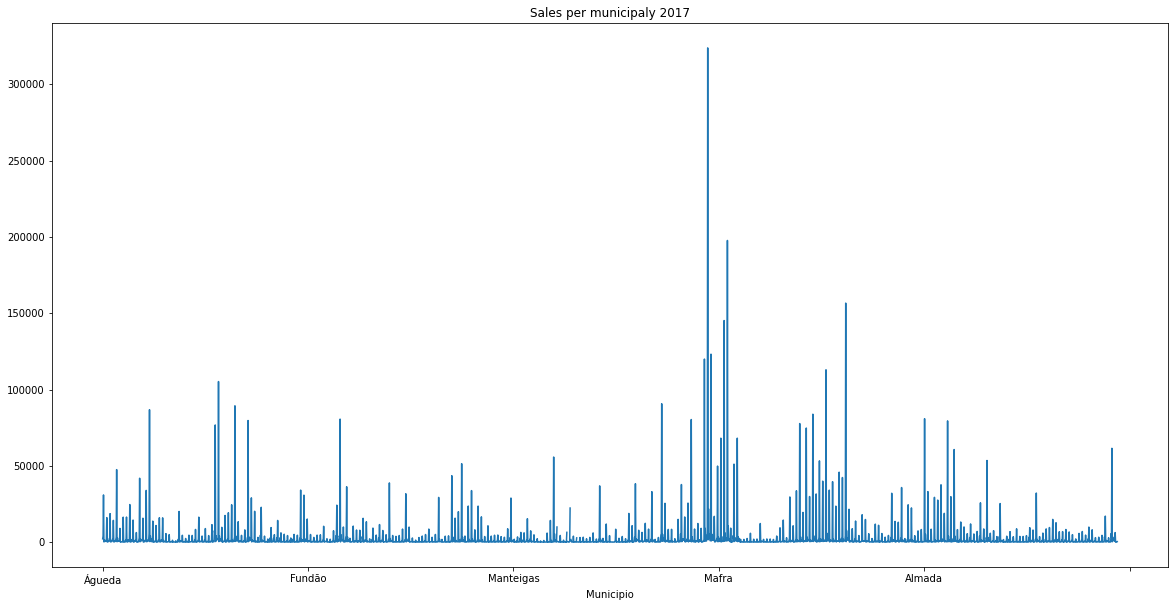

In [28]:
pa['2017'].plot(figsize=(20, 10), title='Sales per municipaly 2017')

In [53]:
pa.nlargest(3, '2017')

,Distrito,Tipo de veiculo,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Municipio,,,,,,,,,,,,,
Lisboa,Lisboa,Ligeiros,321833,347663,333103,327079,331591,319040.0,323741.0,333019.0,323875.0,329059.0,331956.0
Sintra,Lisboa,Ligeiros,175171,187616,185086,182550,185893,183144.0,186950.0,190553.0,197682.0,209674.0,207827.0
Vila Nova de Gaia,Porto,Ligeiros,126203,137116,137612,138305,138175,142877.0,144845.0,145326.0,156630.0,165662.0,172310.0


In [4]:
DATA_FILEPATH_fs = 'https://raw.githubusercontent.com/INmais/LEIS-2001-collaborative-project/main/Mobility/Dados/FuelSalesDGEG2008.csv' 
fs = pd.read_csv(DATA_FILEPATH_fs, sep=';')
fs

,Município,Butano,Propano,Gás auto,Gasolina s/ chumbo 95,Gasolina s/ chumbo 98,Gasolina s/ chumbo 98 Especial,Petróleo iluminante,Petróleo carburante,Gasóleo,Gasóleo Especial,Gasóleo colorido,Gasóleo colorido p/ aquecimento,Biodiesel,Biodiesel B10,Biodiesel B15,Biodiesel B20,Lubrificantes,Asfaltos,Total
0,Abrantes,0.0,0.000,177.973,3083.895540,202.23300,76.24050,0.0,0.0,14212.504400,97.800102,0.000000,0.0,1.281,0.0,0.000000,0.0,18.512,0.0,17870.439550
1,Águeda,0.0,0.000,310.927,4141.474040,238.12950,209.08425,0.0,0.0,15096.331210,242.555067,0.000000,0.0,0.000,0.0,0.000000,0.0,2.655,0.0,20241.156060
2,Aguiar da Beira,0.0,0.000,26.492,469.398424,99.37575,14.64675,0.0,0.0,3343.177206,10.303470,0.000000,0.0,0.000,0.0,0.000000,0.0,0.000,0.0,3963.393600
3,Alandroal,0.0,0.000,0.000,97.190632,13.13400,0.00000,0.0,0.0,425.717451,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.0,0.000,0.0,536.042083
4,Albergaria-a-Velha,0.0,0.000,135.508,3867.793556,234.35550,288.75825,0.0,0.0,21640.160420,1156.601754,411.141933,0.0,0.000,0.0,0.000000,0.0,3.928,0.0,27738.247410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Vimioso,0.0,0.000,0.000,35.390124,41.89500,0.00000,0.0,0.0,198.269397,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.0,0.000,0.0,275.554521
302,Vinhais,0.0,0.000,0.000,198.817652,32.86050,27.14250,0.0,0.0,804.396339,8.594316,0.000000,0.0,0.000,0.0,0.000000,0.0,0.000,0.0,1071.811307
303,Viseu,0.0,-1.615,402.644,10546.808230,883.72425,324.71475,0.0,0.0,40754.241450,518.858811,0.000000,0.0,0.000,0.0,61.646188,0.0,14.253,0.0,53505.275680
304,Vizela,0.0,0.000,0.000,1334.184412,123.57525,31.31250,0.0,0.0,4023.626400,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.0,0.000,0.0,5512.698562


In [14]:
fs = fs.set_index('Município')

In [11]:
fs = fs.drop(['Total'], axis=1)

In [12]:
fs.tail()

,Município,Butano,Propano,Gás auto,Gasolina s/ chumbo 95,Gasolina s/ chumbo 98,Gasolina s/ chumbo 98 Especial,Petróleo iluminante,Petróleo carburante,Gasóleo,Gasóleo Especial,Gasóleo colorido,Gasóleo colorido p/ aquecimento,Biodiesel,Biodiesel B10,Biodiesel B15,Biodiesel B20,Lubrificantes,Asfaltos
301,Vimioso,0.0,0.000,0.000,35.390124,41.89500,0.00000,0.0,0.0,198.269397,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0
302,Vinhais,0.0,0.000,0.000,198.817652,32.86050,27.14250,0.0,0.0,804.396339,8.594316,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0
303,Viseu,0.0,-1.615,402.644,10546.808230,883.72425,324.71475,0.0,0.0,40754.241450,518.858811,0.0,0.0,0.0,0.0,61.646188,0.0,14.253,0.0
304,Vizela,0.0,0.000,0.000,1334.184412,123.57525,31.31250,0.0,0.0,4023.626400,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0
305,Vouzela,0.0,0.000,75.509,665.403596,162.36225,0.00000,0.0,0.0,1920.924207,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0


In [20]:
fs.describe()

,Butano,Propano,Gás auto,Gasolina s/ chumbo 95,Gasolina s/ chumbo 98,Gasolina s/ chumbo 98 Especial,Petróleo iluminante,Petróleo carburante,Gasóleo,Gasóleo Especial,Gasóleo colorido,Gasóleo colorido p/ aquecimento,Biodiesel,Biodiesel B10,Biodiesel B15,Biodiesel B20,Lubrificantes,Asfaltos
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.904000,0.925036,78.418778,4295.575008,441.148088,108.431118,0.011115,0.014457,14503.211135,130.894685,99.626688,4.409321,4.840941,0.655159,35.794433,0.412079,5.824350,0.022827
std,9.298399,6.777439,175.267868,9376.063111,1143.419832,268.385124,0.133533,0.174473,28852.036895,347.200274,493.881070,38.464704,55.994591,9.355792,536.552807,7.208436,16.267704,0.365727
min,0.000000,-1.615000,-0.302000,0.000000,0.000000,0.000000,0.000000,0.000000,105.434379,0.000000,0.000000,0.000000,-587.189000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,431.911095,66.213750,0.000000,0.000000,0.000000,1767.640421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1115.543638,165.175500,27.765750,0.000000,0.000000,4069.203143,18.534528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,75.506250,3948.640388,409.229062,112.077937,0.000000,0.000000,14043.644465,113.689710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.290250,0.000000
max,120.071000,97.625000,1531.113000,90550.462460,14926.917750,3075.464250,2.245568,2.849600,249537.215500,4060.512153,5194.876491,543.611412,499.841000,159.572280,9300.008722,126.096132,134.813000,6.370000


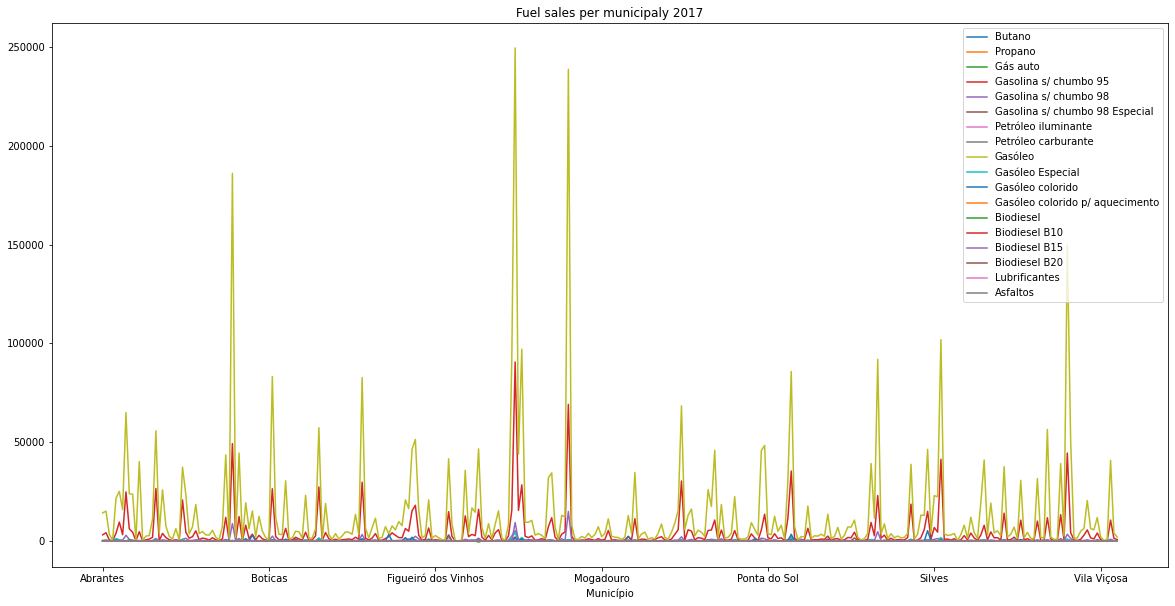

In [18]:
fs.plot(figsize=(20, 10), title='Fuel sales per municipaly 2017')

In [55]:
fs.nlargest(3, 'Gasóleo')

,Butano,Propano,Gás auto,Gasolina s/ chumbo 95,Gasolina s/ chumbo 98,Gasolina s/ chumbo 98 Especial,Petróleo iluminante,Petróleo carburante,Gasóleo,Gasóleo Especial,Gasóleo colorido,Gasóleo colorido p/ aquecimento,Biodiesel,Biodiesel B10,Biodiesel B15,Biodiesel B20,Lubrificantes,Asfaltos
Município,,,,,,,,,,,,,,,,,,
Lisboa,0.0,0.000,1531.113,90550.46246,5175.80550,2008.16550,0.000000,0.0,249537.2155,4060.512153,1444.76244,124.841898,62.077,0.0,9300.008722,0.0,118.697,0.615
Matosinhos,0.0,0.589,545.605,69108.61236,14926.91775,298.02300,0.346112,0.0,238698.2137,705.072060,0.00000,68.986377,281.604,0.0,0.000000,0.0,63.450,0.000
Azambuja,0.0,0.000,209.096,49246.20241,8807.24850,53.07075,0.000000,0.0,186040.8806,156.729087,0.00000,0.000000,0.000,0.0,0.000000,0.0,8.268,0.000


In [5]:
DATA_FILEPATH_pop = 'https://raw.githubusercontent.com/INmais/LEIS-2001-collaborative-project/main/Mobility/Dados/pordata-populac%CC%A7ao%20residente.csv' 
pop = pd.read_csv(DATA_FILEPATH_pop, sep=';')
pop

,Âmbito Geográfico,Anos,1981,2001,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,NUTS 2013,Portugal,9 883 670,10 394 669,10 563 014,10 573 479,10 572 721,10 542 398,10 487 289,10 427 301,10 374 822,10 341 330,10 309 573,10 291 027,10 276 617,10 295 909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NUTS I,Continente,9 384 013,9 904 113,10 051 206,10 059 864,10 057 999,10 030 968,9 976 649,9 918 548,9 869 783,9 839 140,9 809 414,9 792 797,9 779 826,9 798 859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NUTS II,Norte,3 435 810,3 696 333,3 712 554,3 705 980,3 693 585,3 687 224,3 666 234,3 644 195,3 621 785,3 603 778,3 584 575,3 576 205,3 572 583,3 575 338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NUTS III,Alto Minho,258 004,250 491,247 492,246 690,245 306,244 149,242 159,240 134,237 997,236 270,233 813,232 178,230 954,230 412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Município,Arcos de Valdevez,31 240,24 657,23 409,23 185,22 906,22 709,22 426,22 142,21 885,21 621,21 324,21 144,20 970,20 926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Cleaning dataset
removing space, collumns and rows
setting index

In [29]:
pop_mum = pop[pop['Âmbito Geográfico'] == 'Município']

In [32]:
pop_mum.dtypes 

Âmbito Geográfico    object
Anos                 object
1981                 object
2001                 object
2008                 object
                      ...  
Unnamed: 251         object
Unnamed: 252         object
Unnamed: 253         object
Unnamed: 254         object
Unnamed: 255         object
Length: 256, dtype: object

In [34]:
pop_mum = pop_mum[['Âmbito Geográfico','Anos','2017']]

In [35]:
pop_mum

,Âmbito Geográfico,Anos,2017
4,Município,Arcos de Valdevez,21 144
5,Município,Caminha,15 897
6,Município,Melgaço,8 250
7,Município,Monção,18 042
8,Município,Paredes de Coura,8 617
...,...,...,...
347,Município,Ribeira Brava,12 428
348,Município,Santa Cruz,44 417
349,Município,Santana,6 808
350,Município,São Vicente,5 151


In [42]:
pop_mum['2017'] = pop_mum['2017'].astype(str).str.replace('\s+', '') #removing spaces between numbers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
pop_mum['2017'] = pd.to_numeric(pop_mum['2017']) #dtype('O') to numeric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
pop_mum['2017']

4      21144
5      15897
6       8250
7      18042
8       8617
       ...  
347    12428
348    44417
349     6808
350     5151
352     5173
Name: 2017, Length: 308, dtype: int64

In [45]:
pop_mum.describe()

,2017
count,308.000000
mean,33412.425325
std,54895.672187
min,462.000000
25%,6458.000000
50%,14079.000000
75%,35470.750000
max,506088.000000


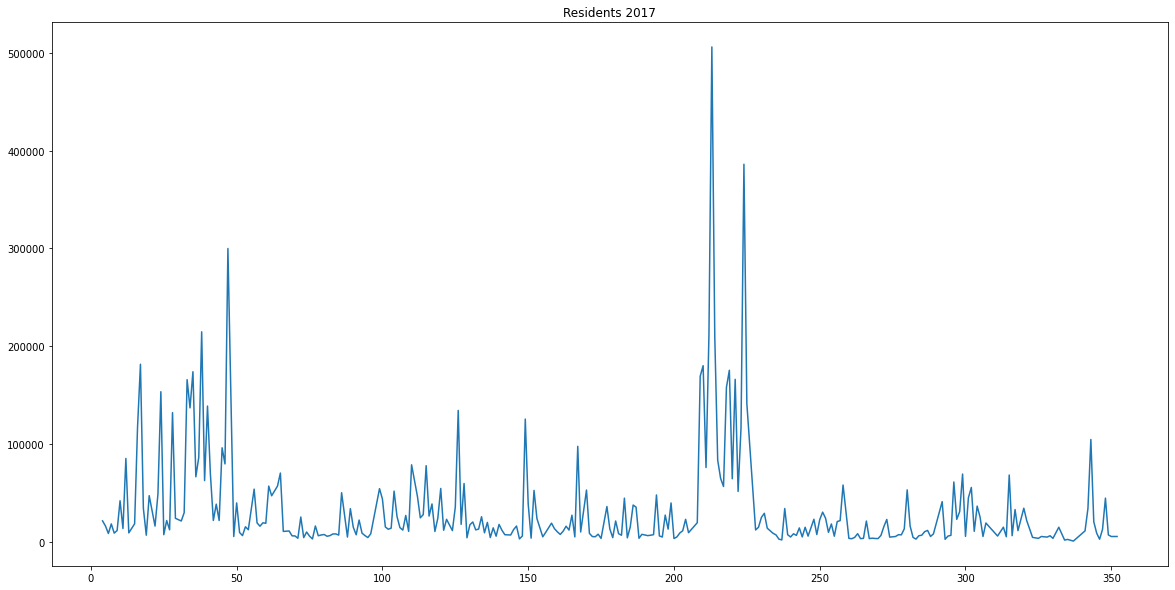

In [59]:
pop_mum['2017'].plot(figsize=(20, 10), title='Residents 2017')

In [58]:
pop_mum.nlargest(5, '2017')

,Âmbito Geográfico,Anos,2017
213,Município,Lisboa,506088
224,Município,Sintra,386038
47,Município,Vila Nova de Gaia,299820
38,Município,Porto,214587
212,Município,Cascais,211714
